<a href="https://colab.research.google.com/github/AryanJadhao/Vision-Transformer/blob/main/ViT_Animal_90_from_sratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [93]:
# Hyper Parameters
num_features = 90
embedding_dim = 256
patch_size = 16
img_size = 224
num_patches = (img_size // patch_size) ** 2
num_layers = 6
num_heads = 4
mlp_dim = 256
dropout = 0.1

##Import Dataset Animal Image Dataset

In [94]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"aryanjadhao","key":"9855d06567ee3bc74ed31be144b6a060"}'}

In [95]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [96]:
!kaggle datasets download iamsouravbanerjee/animal-image-dataset-90-different-animals


Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals
License(s): other
animal-image-dataset-90-different-animals.zip: Skipping, found more recently modified local copy (use --force to force download)


In [97]:
!unzip animal-image-dataset-90-different-animals.zip -d animal90/


Streaming output truncated to the last 5000 lines.
  inflating: animal90/animals/animals/bison/73b10839bc.jpg  
  inflating: animal90/animals/animals/bison/74dc1dd32a.jpg  
  inflating: animal90/animals/animals/bison/75ab166a7d.jpg  
  inflating: animal90/animals/animals/bison/79e1610d01.jpg  
  inflating: animal90/animals/animals/bison/7ba5eee91f.jpg  
  inflating: animal90/animals/animals/bison/7d214aab4b.jpg  
  inflating: animal90/animals/animals/bison/7f2ef9ab03.jpg  
  inflating: animal90/animals/animals/bison/82ec723a4f.jpg  
  inflating: animal90/animals/animals/bison/85e145af6c.jpg  
  inflating: animal90/animals/animals/bison/862e2c6379.jpg  
  inflating: animal90/animals/animals/bison/87a5c700ad.jpg  
  inflating: animal90/animals/animals/bison/88b723ce90.jpg  
  inflating: animal90/animals/animals/bison/8c3af742c3.jpg  
  inflating: animal90/animals/animals/bison/8e34044b98.jpg  
  inflating: animal90/animals/animals/bison/8e6adbdc40.jpg  
  inflating: animal90/animals/anim

In [98]:
import os

base_path = "/content/animal90"
print(os.listdir(base_path))

['animals', 'name of the animals.txt']


In [99]:
data_path = base_path + "/animals/animals"
print(os.listdir(data_path))

['hummingbird', 'cat', 'pelecaniformes', 'parrot', 'beetle', 'oyster', 'reindeer', 'bat', 'leopard', 'ladybugs', 'hamster', 'turkey', 'wolf', 'lion', 'hare', 'starfish', 'orangutan', 'rhinoceros', 'goose', 'hornbill', 'sheep', 'jellyfish', 'tiger', 'caterpillar', 'hippopotamus', 'porcupine', 'horse', 'lizard', 'bison', 'octopus', 'eagle', 'hyena', 'deer', 'coyote', 'raccoon', 'crab', 'turtle', 'antelope', 'squid', 'fox', 'swan', 'zebra', 'koala', 'dolphin', 'squirrel', 'penguin', 'goldfish', 'pigeon', 'elephant', 'owl', 'hedgehog', 'donkey', 'cockroach', 'badger', 'panda', 'cow', 'sparrow', 'butterfly', 'woodpecker', 'shark', 'okapi', 'chimpanzee', 'fly', 'goat', 'dog', 'mouse', 'seahorse', 'grasshopper', 'dragonfly', 'bee', 'mosquito', 'ox', 'sandpiper', 'moth', 'bear', 'snake', 'possum', 'otter', 'rat', 'crow', 'duck', 'pig', 'gorilla', 'lobster', 'kangaroo', 'wombat', 'flamingo', 'seal', 'boar', 'whale']


In [100]:
for cls in os.listdir(data_path):
  cls_path = os.path.join(data_path, cls)
  print(cls, len(os.listdir(cls_path)))

  # data is balanced

hummingbird 60
cat 60
pelecaniformes 60
parrot 60
beetle 60
oyster 60
reindeer 60
bat 60
leopard 60
ladybugs 60
hamster 60
turkey 60
wolf 60
lion 60
hare 60
starfish 60
orangutan 60
rhinoceros 60
goose 60
hornbill 60
sheep 60
jellyfish 60
tiger 60
caterpillar 60
hippopotamus 60
porcupine 60
horse 60
lizard 60
bison 60
octopus 60
eagle 60
hyena 60
deer 60
coyote 60
raccoon 60
crab 60
turtle 60
antelope 60
squid 60
fox 60
swan 60
zebra 60
koala 60
dolphin 60
squirrel 60
penguin 60
goldfish 60
pigeon 60
elephant 60
owl 60
hedgehog 60
donkey 60
cockroach 60
badger 60
panda 60
cow 60
sparrow 60
butterfly 60
woodpecker 60
shark 60
okapi 60
chimpanzee 60
fly 60
goat 60
dog 60
mouse 60
seahorse 60
grasshopper 60
dragonfly 60
bee 60
mosquito 60
ox 60
sandpiper 60
moth 60
bear 60
snake 60
possum 60
otter 60
rat 60
crow 60
duck 60
pig 60
gorilla 60
lobster 60
kangaroo 60
wombat 60
flamingo 60
seal 60
boar 60
whale 60


In [101]:
import matplotlib.pyplot as plt
from PIL import Image
import random

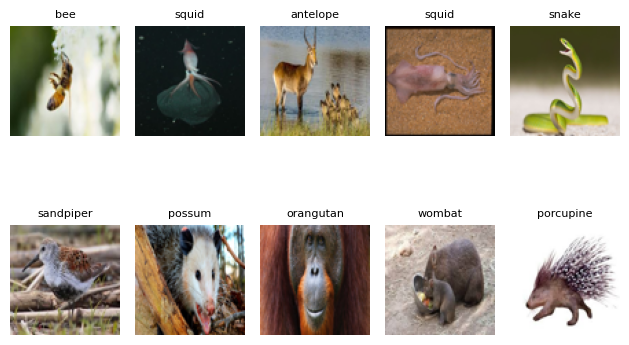

In [102]:
for i in range(10):
  cls = random.choice(os.listdir(data_path))
  img_name = random.choice(os.listdir(os.path.join(data_path, cls)))

  img_path = os.path.join(data_path, cls, img_name)
  img = Image.open(img_path).resize((80,80))

  plt.subplot(2,5,i+1)
  plt.imshow(img)
  plt.title(cls, fontsize=8)
  plt.axis('off')

plt.tight_layout()
plt.show()

In [103]:
full_dataset = datasets.ImageFolder(data_path)

In [104]:
len(full_dataset.classes)

90

In [105]:
train_idx, val_idx = train_test_split(list(range(len(full_dataset))), test_size=0.2, shuffle=True, random_state=42)

In [106]:
train_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [107]:
from torch.utils.data import Subset

In [108]:
train_dataset = datasets.ImageFolder(data_path, transform=train_transform)
train_dataset = Subset(train_dataset, train_idx)

val_dataset = datasets.ImageFolder(data_path, transform=test_transforms)
val_dataset = Subset(val_dataset, val_idx)

In [109]:
batch_size = 32
epochs = 15
learning_rate = 3e-4

In [110]:
# dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

In [111]:
#see 1 batch with [batch_size, num_channels, img_size, img_size]

image,labels = next(iter(train_loader))
image.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

##VIT Architecture

In [112]:
# Patch_Embeddings
class Patch_Embeddings(nn.Module):
  def __init__(self):
    super().__init__()
    self.patch_embed = nn.Conv2d(3, embedding_dim, kernel_size=patch_size, stride=patch_size)

  def forward(self, x):
    x = self.patch_embed(x)       # (B, embed_dim, 14, 14)
    x = x.flatten(2)              # (B, embed_dim, 196)
    x = x.transpose(1,2)          # (B, 196, embed_dim)

    return x

In [113]:
# TransformerEncoder
class TransformerEncoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.layernorm1 = nn.LayerNorm(embedding_dim)
    self.layernorm2 = nn.LayerNorm(embedding_dim)
    self.mha = nn.MultiheadAttention(embedding_dim, num_heads, batch_first=True)
    self.mlp = nn.Sequential(
        nn.Linear(embedding_dim, mlp_dim),
        nn.GELU(),
        nn.Dropout(dropout),
        nn.Linear(mlp_dim, embedding_dim),
        nn.Dropout(dropout)
    )

  def forward(self, x):
    residual = x
    x = self.layernorm1(x)
    x = self.mha(x,x,x)[0]
    x = residual + x

    residual = x
    x = self.layernorm2(x)
    x = self.mlp(x)
    x = residual + x

    return x

In [114]:
# MLPHead
class MLPHead(nn.Module):
  def __init__(self):
    super().__init__()
    self.layernorm = nn.LayerNorm(embedding_dim)
    self.mlp_head = nn.Linear(embedding_dim, num_features)

  def forward(self, x):
    x = self.layernorm(x)
    x = self.mlp_head(x)

    return x

##VIT Model

In [115]:
class VIT(nn.Module):
  def __init__(self):
    super().__init__()
    self.patch_embed = Patch_Embeddings()
    self.cls_token = nn.Parameter(torch.randn(1,1,embedding_dim))
    self.pos_embed = nn.Parameter(torch.randn(1, 1+num_patches, embedding_dim))
    nn.init.trunc_normal_(self.pos_embed, std=0.02)
    self.encoder = nn.Sequential(*[TransformerEncoder() for _ in range(num_layers)])
    self.layernorm = nn.LayerNorm(embedding_dim)
    self.mlp_head = MLPHead()

  def forward(self, x):
    B = x.size(0)

    x = self.patch_embed(x)                           # (B, 196, embed_dim)
    cls_token = self.cls_token.expand(B, -1, -1)
    x = torch.cat([cls_token, x], dim=1)              # (B, 197, embed_dim)

    x = x + self.pos_embed
    x = self.encoder(x)

    x = self.layernorm(x)

    x = x[:,0]                                   # CLS TOKEN

    output = self.mlp_head(x)
    return output

In [120]:
a = torch.randn(2,3,224,224)
model = VIT()
# model(a).shape
b = model.patch_embed(a)
# b.shape

cls_token = model.cls_token.expand(2,-1,-1)
# cls_token.shape
c = torch.cat([cls_token, b], dim=1)
# c.shape

d = c + model.pos_embed
# d.shape

e = model.encoder(d)
# e.shape

f = model.layernorm(e)
# f.shape

g = f[:,0]
# g.shape

output = model.mlp_head(g)
output.shape

torch.Size([2, 90])

In [117]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [118]:
model = VIT()
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr = learning_rate, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

In [119]:
# training loop
for epoch in range(epochs):
    model.train()
    total, correct = 0, 0
    running_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, preds = outputs.max(1)
        correct += preds.eq(labels).sum().item()
        total += labels.size(0)

    scheduler.step()

    train_acc = 100 * correct / total
    print(f"Epoch {epoch+1}/{epochs} | Loss: {running_loss/len(train_loader):.4f} | Acc: {train_acc:.2f}%")

Epoch 1/15 | Loss: 4.3413 | Acc: 4.12%
Epoch 2/15 | Loss: 4.0343 | Acc: 7.82%
Epoch 3/15 | Loss: 3.8056 | Acc: 10.81%
Epoch 4/15 | Loss: 3.5844 | Acc: 15.21%
Epoch 5/15 | Loss: 3.3940 | Acc: 18.80%
Epoch 6/15 | Loss: 3.2039 | Acc: 22.13%
Epoch 7/15 | Loss: 3.0061 | Acc: 26.30%
Epoch 8/15 | Loss: 2.8359 | Acc: 30.67%
Epoch 9/15 | Loss: 2.6989 | Acc: 34.61%
Epoch 10/15 | Loss: 2.6173 | Acc: 36.30%
Epoch 11/15 | Loss: 2.5929 | Acc: 36.76%
Epoch 12/15 | Loss: 2.5991 | Acc: 36.92%
Epoch 13/15 | Loss: 2.6091 | Acc: 37.06%
Epoch 14/15 | Loss: 2.6281 | Acc: 36.02%
Epoch 15/15 | Loss: 2.6110 | Acc: 36.13%


In [122]:
model.eval()
val_loss = 0
val_correct = 0
val_total = 0

with torch.no_grad():
  for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)

    output = model(images)
    loss = criterion(output, labels)

    val_loss += loss.item()
    val_correct += (output.argmax(1) == labels).sum().item()
    val_total += labels.size(0)

  val_acc = 100 * val_correct / val_total
  print(f"Validation Loss: {val_loss/len(test_loader):.4f} | Acc: {val_acc:.2f}%")

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

##USING PRETRAINED ViT

In [121]:
from torchvision.models import vit_b_16, ViT_B_16_Weights

In [123]:
weights = ViT_B_16_Weights.IMAGENET1K_V1
model = vit_b_16(weights=weights)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


100%|██████████| 330M/330M [00:05<00:00, 57.9MB/s]


In [124]:
model.heads.head = nn.Linear(768,90)
model = model.to(device)

In [125]:
for params in model.parameters():
  params.require_grad = False

for params in model.heads.parameters():
  params.require_grad = True

In [126]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)


In [127]:
def accuracy(preds, labels):
    _, predicted = preds.max(1)
    return (predicted == labels).sum().item()

epochs = 10

for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_correct += accuracy(outputs, labels)
        total += labels.size(0)

    scheduler.step()

    val_loss = 0
    val_correct = 0
    val_total = 0
    model.eval()

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            val_correct += accuracy(outputs, labels)
            val_total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Train Acc: {train_correct/total*100:.2f}% | Val Acc: {val_correct/val_total*100:.2f}%")


Epoch 1/10
Train Acc: 60.30% | Val Acc: 67.87%
Epoch 2/10
Train Acc: 82.96% | Val Acc: 77.04%
Epoch 3/10
Train Acc: 89.28% | Val Acc: 73.89%
Epoch 4/10
Train Acc: 94.17% | Val Acc: 81.02%
Epoch 5/10
Train Acc: 97.69% | Val Acc: 80.93%
Epoch 6/10
Train Acc: 98.91% | Val Acc: 86.48%
Epoch 7/10
Train Acc: 99.72% | Val Acc: 87.04%
Epoch 8/10
Train Acc: 99.93% | Val Acc: 88.43%
Epoch 9/10
Train Acc: 99.93% | Val Acc: 88.24%
Epoch 10/10
Train Acc: 99.98% | Val Acc: 88.33%
